In [117]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sn

In [167]:
#Load the important libraries neede
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data = pd.read_csv("train.csv")

# Display the first few rows of the data
print(data.head())

# Get the shape of the data just to know how many rows and columns it contains
print(data.shape)

# Any results you write to the current directory are saved as output.

              Dates        Category                      Descript  DayOfWeek  \
0  13-05-2015 23:53        WARRANTS                WARRANT ARREST  Wednesday   
1  13-05-2015 23:53  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   
2  13-05-2015 23:33  OTHER OFFENSES      TRAFFIC VIOLATION ARREST  Wednesday   
3  13-05-2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   
4  13-05-2015 23:30   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO  Wednesday   

  PdDistrict      Resolution                    Address           X          Y  
0   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
1   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892  37.774599  
2   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363  37.800414  
3   NORTHERN            NONE   1500 Block of LOMBARD ST -122.426995  37.800873  
4       PARK            NONE  100 Block of BRODERICK ST -122.438738  37.771541  
(878049, 9)


In [198]:
#target variable

target = data["Category"].unique()
print(target)

# There are multiple categorical values. It looks like a multi class classification problem.

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


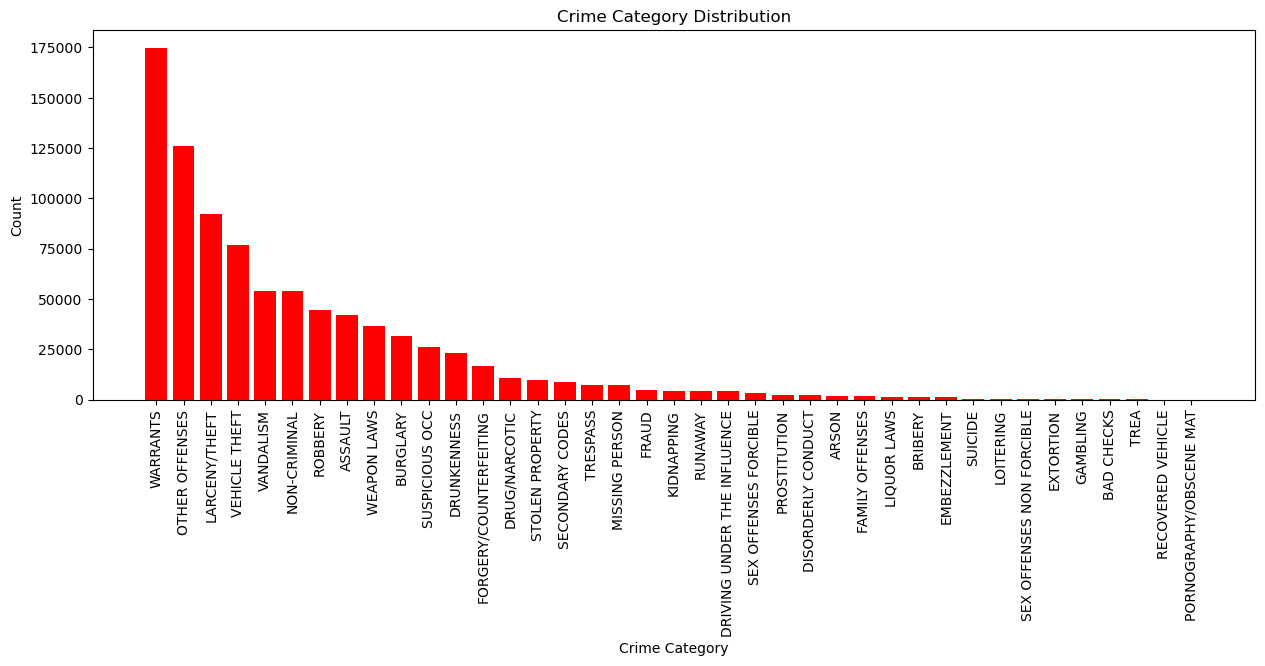

In [57]:
plt.figure().set_figwidth(15)
plt.bar(data['Category'].unique(),data['Category'].value_counts(), color='red')
plt.xlabel('Crime Category')
plt.xticks(rotation=90) 
plt.ylabel('Count')
plt.title('Crime Category Distribution')
plt.show()

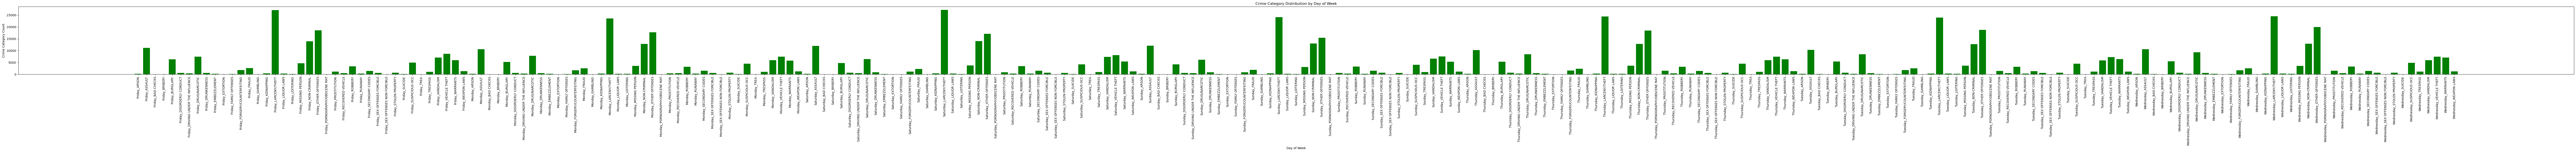

In [59]:
plt.figure(figsize=(150,4))
# plt.figure().set_figheight(4)

# Assuming day_wise_counts is a Pandas Series with a MultiIndex
day_wise_counts = data.groupby(['DayOfWeek', 'Category']).size()

# Convert the MultiIndex to a string representation
day_wise_counts.index = [f"{day}_{category}" for day, category in day_wise_counts.index]

# Create a bar chart of the crime category counts for each day of the week
plt.bar(day_wise_counts.index, day_wise_counts.values, color='green')
plt.xlabel('Day of Week')
plt.ylabel('Crime Category Count')
plt.title('Crime Category Distribution by Day of Week')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [72]:
data['Category']

0                       WARRANTS
1                 OTHER OFFENSES
2                 OTHER OFFENSES
3                  LARCENY/THEFT
4                  LARCENY/THEFT
                   ...          
878044                   ROBBERY
878045             LARCENY/THEFT
878046             LARCENY/THEFT
878047                 VANDALISM
878048    FORGERY/COUNTERFEITING
Name: Category, Length: 878049, dtype: object

In [172]:
data_dict = {}
count = 1
for d in target:
    data_dict[d] = count
    count+=1
data["Category"] = data["Category"].replace(data_dict)

#Replacing the day of weeks
data_week_dict = {
    "Monday": 1,
    "Tuesday":2,
    "Wednesday":3,
    "Thursday":4,
    "Friday":5,
    "Saturday":6,
    "Sunday":7
}
data["DayOfWeek"] = data["DayOfWeek"].replace(data_week_dict)
# test_data["DayOfWeek"] = test_data["DayOfWeek"].replace(data_week_dict)
#District
district = data["PdDistrict"].unique()
data_dict_district = {}
count = 1
for d in district:
    data_dict_district[d] = count
    count+=1 
data["PdDistrict"] = data["PdDistrict"].replace(data_dict_district)
# test_data["PdDistrict"] = test_data["PdDistrict"].replace(data_dict_district)

In [76]:
print(data.head())

              Dates  Category                      Descript  DayOfWeek  \
0  13-05-2015 23:53         1                WARRANT ARREST          3   
1  13-05-2015 23:53         2      TRAFFIC VIOLATION ARREST          3   
2  13-05-2015 23:33         2      TRAFFIC VIOLATION ARREST          3   
3  13-05-2015 23:30         3  GRAND THEFT FROM LOCKED AUTO          3   
4  13-05-2015 23:30         3  GRAND THEFT FROM LOCKED AUTO          3   

   PdDistrict      Resolution                    Address           X  \
0           1  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
1           1  ARREST, BOOKED         OAK ST / LAGUNA ST -122.425892   
2           1  ARREST, BOOKED  VANNESS AV / GREENWICH ST -122.424363   
3           1            NONE   1500 Block of LOMBARD ST -122.426995   
4           2            NONE  100 Block of BRODERICK ST -122.438738   

           Y  
0  37.774599  
1  37.774599  
2  37.800414  
3  37.800873  
4  37.771541  


In [168]:
columns_train = data.columns
print(columns_train)
# columns_test = test_data.columns
# print(columns_test)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')


In [169]:
cols = columns_train.drop("Resolution")
print(cols)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address',
       'X', 'Y'],
      dtype='object')


In [170]:
l_dates = LabelEncoder()
l_address = LabelEncoder()

In [173]:
data_new = data[cols]
data_new.Dates = l_dates.fit_transform(data_new.Dates)
data_new.Address = l_dates.fit_transform(data_new.Address)
print(data_new.head())

C:\Users\admin\AppData\Local\Temp\ipykernel_11492\1043615815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.Dates = l_dates.fit_transform(data_new.Dates)


    Dates  Category                      Descript  DayOfWeek  PdDistrict  \
0  158434         1                WARRANT ARREST          3           1   
1  158434         2      TRAFFIC VIOLATION ARREST          3           1   
2  158433         2      TRAFFIC VIOLATION ARREST          3           1   
3  158432         3  GRAND THEFT FROM LOCKED AUTO          3           1   
4  158432         3  GRAND THEFT FROM LOCKED AUTO          3           2   

   Address           X          Y  
0    19790 -122.425892  37.774599  
1    19790 -122.425892  37.774599  
2    22697 -122.424363  37.800414  
3     4266 -122.426995  37.800873  
4     1843 -122.438738  37.771541  


C:\Users\admin\AppData\Local\Temp\ipykernel_11492\1043615815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new.Address = l_dates.fit_transform(data_new.Address)


In [122]:
print(data_new.describe())

# All the numeric columns have no missing values.

               Dates       Category      DayOfWeek     PdDistrict  \
count  878049.000000  878049.000000  878049.000000  878049.000000   
mean   193172.432027       7.224975       3.992691       6.037957   
std    112872.582008       6.111544       1.972023       3.114945   
min         0.000000       1.000000       1.000000       1.000000   
25%     95302.000000       3.000000       2.000000       3.000000   
50%    193069.000000       5.000000       4.000000       6.000000   
75%    290472.000000      10.000000       6.000000       9.000000   
max    389256.000000      39.000000       7.000000      10.000000   

             Address              X              Y  
count  878049.000000  878049.000000  878049.000000  
mean     9478.753977    -122.422616      37.771020  
std      6055.680160       0.030354       0.456893  
min         0.000000    -122.513642      37.707879  
25%      4299.000000    -122.432952      37.752427  
50%      9114.000000    -122.416420      37.775421  
75%    

In [175]:
data_new.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Address',
       'X', 'Y'],
      dtype='object')

In [176]:
x = data_new[['Dates',"DayOfWeek", "PdDistrict", 'Address', "X", "Y"]]
y = data_new['Category']

In [177]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

In [178]:
print("Train Dataset Size:",len(X_train))
print("Test Dataset Size :",len(X_test))

Train Dataset Size: 614634
Test Dataset Size : 263415


In [136]:
#Let's use knn algorithm on numeric columns

# features = ["DayOfWeek", "PdDistrict",  "X", "Y"]
# X_train = train_data[features]
# y_train = train_data["Category"]

for i in range(10,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    x = knn.score(X_test, Y_test)
    print(i ," : ", x)
# predictions = knn.predict(X_test)

10  :  0.17670595827876165
11  :  0.1780460490101171
12  :  0.17868762219311732
13  :  0.1793709545773779
14  :  0.17986067611943132
15  :  0.1805326196306209
16  :  0.18121595201488147
17  :  0.18192585843630774
18  :  0.18269270922308903
19  :  0.1829242829755329
20  :  0.18355826357648578
21  :  0.18402900366342084
22  :  0.18421502192358066
23  :  0.1841960404684623
24  :  0.1844124290568115
25  :  0.18492113205398325
26  :  0.18531594632044493
27  :  0.18544122392422602
28  :  0.18617390809179432
29  :  0.1866446481787294
30  :  0.18696353662471765
31  :  0.18729001765275327
32  :  0.18751399882314979
33  :  0.18790881308961144
34  :  0.18829983106504944
35  :  0.188546589981588
36  :  0.18884649697245792
37  :  0.18925649640301426
38  :  0.18920334832868288
39  :  0.18982594005656472
40  :  0.18951084790160014
41  :  0.18974621794506766
42  :  0.18971584761687832
43  :  0.19011445817436365
44  :  0.19010306930129264
45  :  0.19026251352428677
46  :  0.19068010553689047
47  :  0.1

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans

In [142]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

In [143]:
model.score(X_test, Y_test)

0.2457946586185297

In [180]:
d_model = DecisionTreeClassifier()
d_model.fit(X_train.drop(columns=['Dates', 'Address']), Y_train)

DecisionTreeClassifier()

In [190]:
d_model.score(X_test.drop(columns=['Dates', 'Address']), Y_test)

0.2615075071654993

In [189]:
prediction = d_model.predict(X_test.drop(columns=['Dates', 'Address']))

In [192]:
cn = confusion_matrix(prediction, Y_test)
print(cn)

[[  850  1632  1280 ...     2    57     1]
 [ 3074 12785  7406 ...    12   198     1]
 [ 3107  8658 28726 ...    54   219     2]
 ...
 [    0     0     7 ...     0     0     0]
 [    6    35    53 ...     0     7     0]
 [    0     0     1 ...     0     0     0]]


Text(2470.722222222222, 0.5, 'Truth')

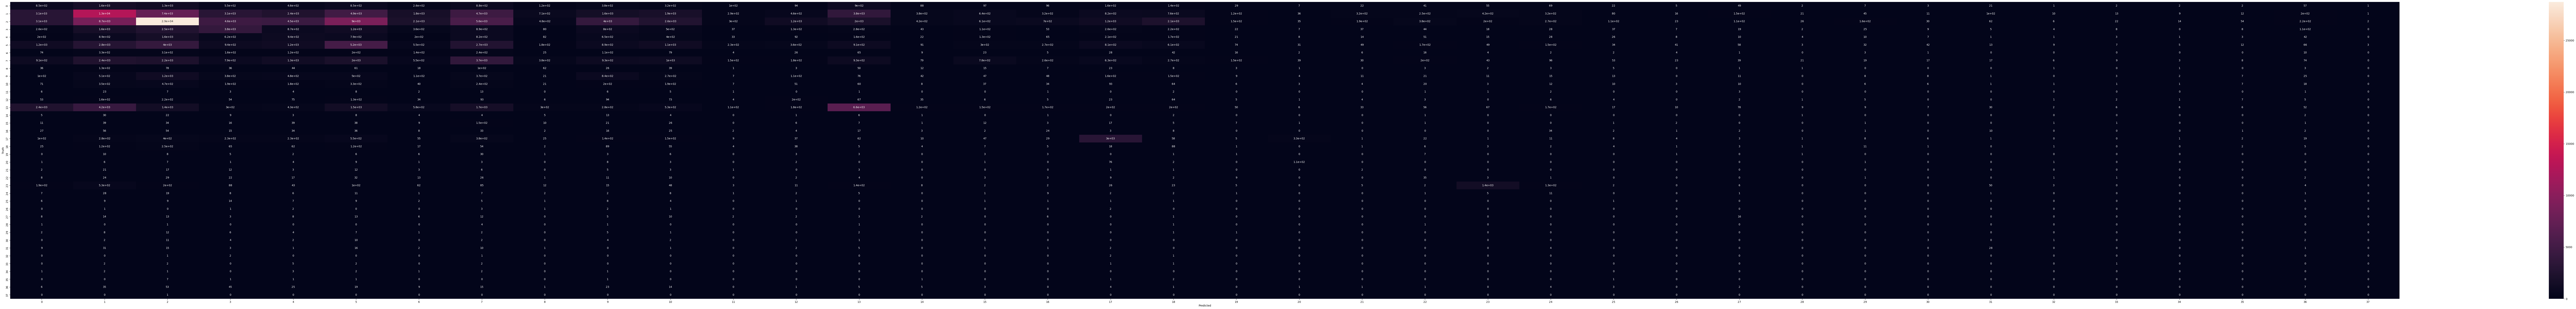

In [194]:
plt.figure(figsize=(200,20))
sn.heatmap(cn, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

[Text(0.7131969207256869, 0.9905660377358491, 'x[3] <= 37.785\ngini = 0.903\nsamples = 614634\nvalue = [29447, 87957, 122663, 37618, 31305, 64600, 16255, 54025\n6024, 25676, 21921, 3021, 7473, 37777, 3153, 7065\n5095, 18141, 11761, 1647, 1344, 1574, 3028, 5205, 3058\n1054, 343, 1341, 213, 835, 342, 859, 95, 157, 100\n272, 5, 2167, 18]'),
 Text(0.49653730958969144, 0.9716981132075472, 'x[3] <= 37.764\ngini = 0.908\nsamples = 473080\nvalue = [23983, 72925, 80843, 30520, 24580, 48621, 12993, 43323\n5266, 17696, 17311, 2335, 5508, 32931, 2295, 5949\n3601, 16178, 8082, 1360, 1304, 1270, 2424, 3250, 2272\n865, 300, 1148, 195, 532, 246, 635, 88, 109, 71\n178, 4, 1874, 15]'),
 Text(0.27905416678417716, 0.9528301886792453, 'x[2] <= -122.421\ngini = 0.914\nsamples = 219816\nvalue = [8407, 35386, 30242, 19625, 13518, 19979, 6546, 22457\n2986, 9556, 8948, 910, 2592, 8576, 941, 3558, 1509\n10317, 3576, 733, 777, 574, 1259, 2304, 998, 565\n213, 519, 128, 251, 149, 163, 59, 58, 45, 86, 3\n1296, 7]'),

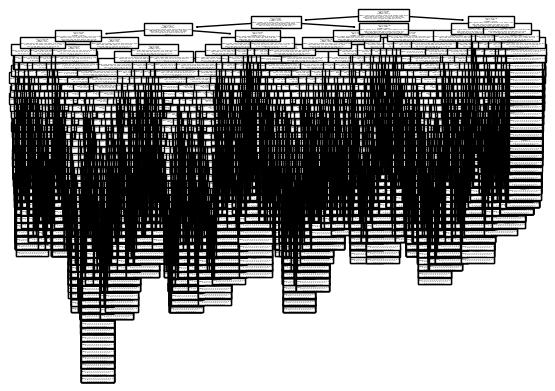

In [163]:
from sklearn import tree
tree.plot_tree(d_model)